## 시각화 및 데이터 분석

2021.08.21(토)

In [1]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
# import random undersampling and other necessary libraries 
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
df = pd.read_csv("insurancedata.csv")
print(df.shape)
print(df.head())

(7626, 17)
   Unnamed: 0 SIU_CUST_YN  SEX  AGE FP_CAREER  OCCP_GRP  TOTALPREM  \
0           0           N    2    4         N         1         14   
1           1           N    1    6         N        11          2   
2           2           N    1    5         Y         2         15   
3           3           N    1    5         N        17         13   
4           4           N    1    5         N         1          3   

   MAIN_INSR_AMT_SUM  EXPR_SUM  WORK_YEARS_MIN  EXPR_COUNT  DMND_AMT_SUM  \
0          120266433         0               0           8        141450   
1            5000000         0               1           1       1390000   
2         1797991770        22               1          24       2480000   
3          212274240         3               1           6         72320   
4           75256800         3              13           4       1300000   

   CLAIM_CNT  TOTAL_VLID_HOSP_OTDA  HOSP_VARIES  HOSP_DVSN_VARIES  \
0          4                     5        

## N : 0 / Y : 1 의 각각 비율 확인

In [4]:
df.SIU_CUST_YN.value_counts()

N    6901
Y     725
Name: SIU_CUST_YN, dtype: int64

N    90.49305
Y     9.50695
Name: SIU_CUST_YN, dtype: float64


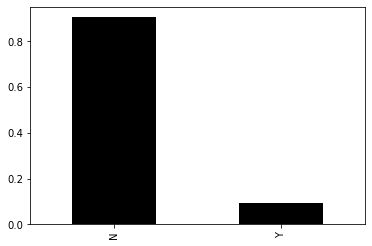

In [5]:
df.SIU_CUST_YN.value_counts(normalize=True).plot(kind='bar', color = "black")
print(df.SIU_CUST_YN.value_counts(normalize=True)*100)

## 데이터 추가정제

데이터에 맞춰서 하나만 실행

In [6]:
#insurance data

df['SIU_CUST_YN'].replace('N', 0, inplace = True)
df['SIU_CUST_YN'].replace('Y', 1, inplace = True)
df['FP_CAREER'].replace('N', 0, inplace = True)
df['FP_CAREER'].replace('Y', 1, inplace = True)
df.drop(['Unnamed: 0'], axis=1, inplace = True)
df.drop(['EXPR_SUM'], axis=1, inplace = True)
df.drop(['TOTALPREM'], axis=1, inplace = True)

In [7]:
df.head()

,SIU_CUST_YN,SEX,AGE,FP_CAREER,OCCP_GRP,MAIN_INSR_AMT_SUM,WORK_YEARS_MIN,EXPR_COUNT,DMND_AMT_SUM,CLAIM_CNT,TOTAL_VLID_HOSP_OTDA,HOSP_VARIES,HOSP_DVSN_VARIES,CHME_LICE_COUNT
0,0,2,4,0,1,120266433,0,8,141450,4,5,2,2,1
1,0,1,6,0,11,5000000,1,1,1390000,3,6,3,2,3
2,0,1,5,1,2,1797991770,1,24,2480000,10,21,4,3,4
3,0,1,5,0,17,212274240,1,6,72320,1,5,1,1,1
4,0,1,5,0,1,75256800,13,4,1300000,4,26,2,2,2


In [8]:
X = df.iloc[:,1:] # SIU_CUST_YN을 제외한 모든 cloumn
y = df.iloc[:,0] # SIU_CUST_YN

In [9]:
# 데이터에 StartifiedKFold를 적용하기 위해서 nd.array형태로 데이터 변환
X = X.to_numpy()
print(type(X))

<class 'numpy.ndarray'>


4
TRAIN: [1899 1900 1901 ... 7623 7624 7625] TEST: [   0    1    2 ... 1940 1942 1943]
Before Sampling:  Counter({0: 5175, 1: 544})
After oversampling(ADASYN):  Counter({0: 5175, 1: 5175})
score = 0.8898793917147352
coef = [[ 0.07501671 -0.43208763 -0.07403881 -0.11237722  0.4688973  -0.22486579
  -0.33277315  0.77722594 -0.40351535  3.15611153 -0.52519767  0.21475913
   0.86030449]]
x_result = [[0.90106416 0.09893584]
 [0.95044234 0.04955766]
 [0.5531544  0.4468456 ]
 ...
 [0.26698836 0.73301164]
 [0.76430742 0.23569258]
 [0.07105324 0.92894676]]
result
---------------------------
accuracy: 0.89
precision: 0.43
recall: 0.53
F1: 0.48


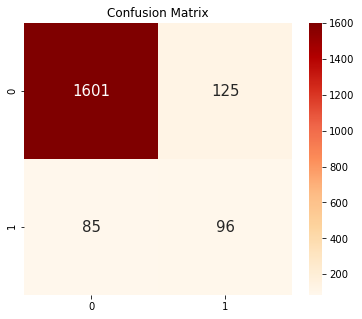

TRAIN: [   0    1    2 ... 7623 7624 7625] TEST: [1899 1900 1901 ... 4041 4054 4058]
Before Sampling:  Counter({0: 5176, 1: 543})
After oversampling(ADASYN):  Counter({0: 5176, 1: 5176})
score = 0.8945988463555322
coef = [[-0.01058437 -0.38915507 -0.22695846 -0.26793384  0.33572927 -0.18500889
  -0.22139968  0.22855694 -0.90447971  2.78979454  2.51569912 -0.91273634
   0.2048424 ]]
x_result = [[0.91605609 0.08394391]
 [0.5637163  0.4362837 ]
 [0.87166115 0.12833885]
 ...
 [0.37174975 0.62825025]
 [0.33869346 0.66130654]
 [0.34463914 0.65536086]]
result
---------------------------
accuracy: 0.89
precision: 0.46
recall: 0.59
F1: 0.52


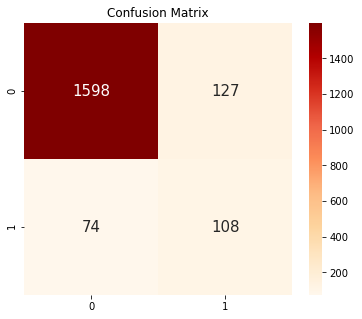

TRAIN: [   0    1    2 ... 7623 7624 7625] TEST: [3782 3783 3784 ... 5804 5815 5820]
Before Sampling:  Counter({0: 5176, 1: 544})
After oversampling(ADASYN):  Counter({0: 5176, 1: 5176})
score = 0.8871983210912907
coef = [[-0.14902147 -0.40967093  0.05499751 -0.14335091  0.28412765 -0.00660646
  -0.1028389   1.37729529 -1.78625605  3.52695917 -0.55044371  0.25984869
   2.38578986]]
x_result = [[7.07476984e-01 2.92523016e-01]
 [8.26696368e-01 1.73303632e-01]
 [8.54704735e-01 1.45295265e-01]
 ...
 [3.81061565e-01 6.18938435e-01]
 [3.12104821e-06 9.99996879e-01]
 [8.18296279e-01 1.81703721e-01]]
result
---------------------------
accuracy: 0.89
precision: 0.41
recall: 0.46
F1: 0.44


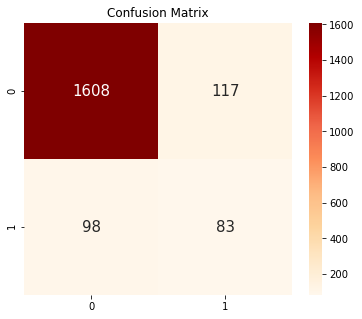

TRAIN: [   0    1    2 ... 5804 5815 5820] TEST: [5710 5711 5712 ... 7623 7624 7625]
Before Sampling:  Counter({0: 5176, 1: 544})
After oversampling(ADASYN):  Counter({0: 5176, 1: 5176})
score = 0.8856243441762854
coef = [[-0.15828782 -0.49809813  0.17549475 -0.2126006   0.35281119 -0.11583891
  -0.17767095  0.11367364 -1.06663037  4.55308714 -0.17534172 -0.05921349
   1.51757849]]
x_result = [[0.90746642 0.09253358]
 [0.93205795 0.06794205]
 [0.55032594 0.44967406]
 ...
 [0.94318613 0.05681387]
 [0.88850028 0.11149972]
 [0.18117337 0.81882663]]
result
---------------------------
accuracy: 0.89
precision: 0.42
recall: 0.52
F1: 0.47


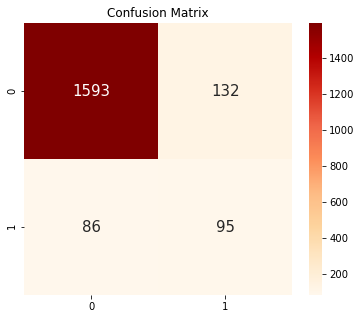

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from collections import Counter
from imblearn.over_sampling import SVMSMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

model = LogisticRegression()

SK_fold = StratifiedKFold(n_splits=4)
print(SK_fold.get_n_splits(df, df['SIU_CUST_YN']))

result_data = []
answers=[]
result_y = []


accuracy = []
precision = []
recall = []
fscore = []
train_idx = []
test_idx = []

for train_index, test_index in SK_fold.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    train_idx.append(train_index)
    test_idx.append(test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #SVMSOMTE -> 오버샘플링 기법
    SVMSOMTE = SVMSMOTE()
    X_train_SVMSOMTE, y_train_SVMSOMTE = SVMSOMTE.fit_resample(X_train, y_train)
    
    print("Before Sampling: ",Counter(y_train))
    print("After oversampling(ADASYN): ",Counter(y_train_SVMSOMTE))
    
    # 해당 변수를 설정해서 Sampling 방식 선택 후 머신러닝 실행
    X_train_sampling = X_train_SVMSOMTE
    y_train_sampling = y_train_SVMSOMTE
    
    scaler = StandardScaler()
    X_train_sampling = scaler.fit_transform(X_train_sampling)
    X_test = scaler.transform(X_test)
    
    # 학습 알고리즘 예시 (LogisticRegressiong - 로지스틱 회귀분석)
    model.fit(X_train_sampling, y_train_sampling)
    
    # sklearn에서 제공하는 score값
    print('score =', model.score(X_test, y_test))
    
    # 각 속성별 가중치 -> 절대값으로 보면됨.
    print('coef =', model.coef_)
    
    print('x_result =', model.predict_proba(X_test))
    
    
    result_data.append(model.predict_proba(X_test)[:,1:])
    answers.append(y_test)
    
    predict_X = model.predict(X_test)
    result_y.append(model.predict(X_test))
    
    print('result')
    print("---------------------------")
    print('accuracy: %.2f' % accuracy_score(y_test, predict_X))
    print('precision: %.2f' % precision_score(y_test, predict_X))
    print('recall: %.2f' % recall_score(y_test, predict_X))
    print('F1: %.2f' % f1_score(y_test, predict_X))
    
    
    accuracy.append(accuracy_score(y_test, predict_X))
    precision.append(precision_score(y_test, predict_X))
    recall.append(recall_score(y_test, predict_X))
    fscore.append(f1_score(y_test, predict_X))
    
    import seaborn as sns
    confusion = confusion_matrix(y_true = y_test
                             , y_pred = predict_X)

    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
    plt.title('Confusion Matrix')
    plt.show()

## 교차검증 평균 값

In [11]:
import itertools
answers = list(itertools.chain.from_iterable(answers))
result_y = list(itertools.chain.from_iterable(result_y))

In [12]:
confusion = confusion_matrix(y_true = result_y
                             , y_pred = answers)

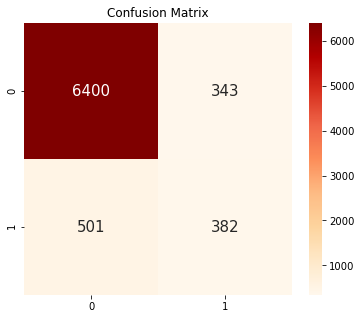

In [13]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [14]:
print('mean')
print("---------------------------")
print('accuracy: %.2f' % (sum(accuracy)/len(accuracy)))
print('precision: %.2f' % (sum(precision)/len(precision)))
print('recall: %.2f' % (sum(recall)/len(recall)))
print('F1: %.2f' % (sum(fscore)/len(fscore)))

mean
---------------------------
accuracy: 0.89
precision: 0.43
recall: 0.53
F1: 0.47


## 데이터 확인 및 정제

In [15]:
result_data = list(itertools.chain.from_iterable(result_data))
result_data = list(map(float, result_data))

In [16]:
# datas => 정답여부 
# test_idx => test_index의 index number
# answers => y_test(정답)
# result_data => train 후 test_X를 활용해 예측된 결과값

datas = []
for i in range(len(answers)):
    if answers[i] == 1:
        if result_data[i] >=0.5:
            datas.append(1)
        else :
            datas.append(0)
            
    elif answers[i] == 0:
        if result_data[i] <0.5:
            datas.append(1)
        else :
            datas.append(0)
        

In [17]:
print(len(answers), len(result_data), len(datas))

7626 7626 7626


In [18]:
print(type(answers), type(answers[0]))
print(type(result_data), type(result_data[0]))
print(type(datas), type(datas[0]))

<class 'list'> <class 'int'>
<class 'list'> <class 'float'>
<class 'list'> <class 'int'>


In [19]:
df = pd.DataFrame({'answers':answers,'result_data':result_data,'datas':datas})

In [20]:
df

,answers,result_data,datas
0,0,0.098936,1
1,0,0.049558,1
2,0,0.446846,1
3,0,0.056534,1
4,0,0.070723,1
...,...,...,...
7621,0,0.127512,1
7622,0,0.119452,1
7623,0,0.056814,1
7624,0,0.111500,1


## 결과 데이터 정제

In [21]:
y1 = np.array([0 for i in range(10)])
count = 0
for i in df['datas']:
    if i==1 and df['result_data'][count] < 0.1 :
        y1[0] +=1
    elif i==1 and df['result_data'][count] < 0.2 :
        y1[1] +=1
    elif i==1 and df['result_data'][count] < 0.3 :
        y1[2] +=1
    elif i==1 and df['result_data'][count] < 0.4 :
        y1[3] +=1
    elif i==1 and df['result_data'][count] < 0.5 :
        y1[4] +=1
    elif i==1 and df['result_data'][count] < 0.6 :
        y1[5] +=1
    elif i==1 and df['result_data'][count] < 0.7 :
        y1[6] +=1
    elif i==1 and df['result_data'][count] < 0.8 :
        y1[7] +=1
    elif i==1 and df['result_data'][count] < 0.9 :
        y1[8] +=1
    elif i==1 and df['result_data'][count] <= 1 :
        y1[9] +=1
    count+=1

In [22]:
y3 = np.array([0 for i in range(10)])
count = 0
for i in df['datas']:
    if i==0 and df['result_data'][count] < 0.1 :
        y3[0] +=1
    elif i==0 and df['result_data'][count] < 0.2 :
        y3[1] +=1
    elif i==0 and df['result_data'][count] < 0.3 :
        y3[2] +=1
    elif i==0 and df['result_data'][count] < 0.4 :
        y3[3] +=1
    elif i==0 and df['result_data'][count] < 0.5 :
        y3[4] +=1
    elif i==0 and df['result_data'][count] < 0.6 :
        y3[5] +=1
    elif i==0 and df['result_data'][count] < 0.7 :
        y3[6] +=1
    elif i==0 and df['result_data'][count] < 0.8 :
        y3[7] +=1
    elif i==0 and df['result_data'][count] < 0.9 :
        y3[8] +=1
    elif i==0 and df['result_data'][count] <= 1 :
        y3[9] +=1
    count+=1

In [23]:
y2 =  np.array([0 for i in range(10)])
count = 0
for i in df['datas']:
    if df['result_data'][count] < 0.1 :
        y2[0] +=1
    elif df['result_data'][count] < 0.2 :
        y2[1] +=1
    elif df['result_data'][count] < 0.3 :
        y2[2] +=1
    elif df['result_data'][count] < 0.4 :
        y2[3] +=1
    elif df['result_data'][count] < 0.5 :
        y2[4] +=1
    elif df['result_data'][count] < 0.6 :
        y2[5] +=1
    elif df['result_data'][count] < 0.7 :
        y2[6] +=1
    elif df['result_data'][count] < 0.8 :
        y2[7] +=1
    elif df['result_data'][count] < 0.9 :
        y2[8] +=1
    elif df['result_data'][count] <= 1:
        y2[9] +=1
    count+=1

In [24]:
df = pd.DataFrame({'correct':y1,'all':y2,'wrong':y3})

## 데이터 시각화

In [26]:
x =  np.array([i for i in range(10)])

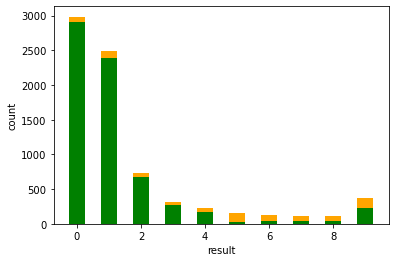

In [27]:
import matplotlib.pyplot as plt
# 주황으로 보이는 부분이 오답이라고 생각하면 됨.
plt.bar(x,y2, width=0.5, color = 'orange')
plt.bar(x,y1, width=0.5, color ='green')
#plt.bar(x,y3, width=0.5, color ='blue')
plt.xlabel('result')
plt.ylabel('count')
plt.show()

plt.show()